In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation

pd.options.display.float_format = '{:,.0f}'.format

In [2]:
games = pd.read_csv('data/games.csv')
games.head()


,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2018090600,2018,1,09/06/2018,20:20:00,PHI,ATL
1,2018090900,2018,1,09/09/2018,13:00:00,BAL,BUF
2,2018090901,2018,1,09/09/2018,13:00:00,CLE,PIT
3,2018090902,2018,1,09/09/2018,13:00:00,IND,CIN
4,2018090903,2018,1,09/09/2018,13:00:00,MIA,TEN


In [3]:
players = pd.read_csv('data/players.csv')
players.head()

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen


In [4]:
plays = pd.read_csv('data/plays.csv')
plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,"44,966",...,NaN,NaN,NaN,0,0,NaN,66,NaN,40,45
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,"45,603",...,UNSd,PHI 18,-15,0,0,NaN,56,5,36,18
2,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,"27,091",...,NaN,NaN,NaN,0,0,NaN,21,NaN,0,13
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,"37,267",...,NaN,NaN,NaN,0,3,NaN,64,30,34,75
4,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,"45,603",...,NaN,NaN,NaN,0,3,NaN,65,NaN,45,45


In [5]:
scout = pd.read_csv('data/PFFScoutingData.csv')
scout
# gunner_cols = [f'gunner{i}' for i in range(1, 5)]
# gunner_values = np.array([
#     np.pad(row, (0, 4 - len(row)), 'constant', constant_values=(np.nan,)) for row in scout['gunners'].str.split(';')])

# print(gunner_values)

# print(scout['gunners'].str.split(';').fillna(pd.Series(np.zeros(4))))


# pd.DataFrame(gunner_values, index=scout.index).head(20)
# scout[gunner_cols] = pd.DataFrame(gunner_values, index=scout.index)
# scout.head()


,gameId,playId,snapDetail,snapTime,operationTime,hangTime,kickType,kickDirectionIntended,kickDirectionActual,returnDirectionIntended,returnDirectionActual,missedTackler,assistTackler,tackler,kickoffReturnFormation,gunners,puntRushers,specialTeamsSafeties,vises,kickContactType
0,2018090600,37,NaN,NaN,NaN,4,D,R,R,NaN,NaN,NaN,NaN,NaN,8-0-2,NaN,NaN,PHI 23; PHI 27,NaN,NaN
1,2018090600,366,OK,1,2,4,N,C,C,C,R,PHI 57,NaN,PHI 54,NaN,PHI 18; PHI 29,NaN,NaN,ATL 83; ATL 27; ATL 34; ATL 21,CC
2,2018090600,658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHI 58,NaN,NaN
3,2018090600,677,NaN,NaN,NaN,4,D,R,R,C,C,ATL 83,ATL 22,ATL 27,8-0-2,NaN,NaN,ATL 17; ATL 22,NaN,NaN
4,2018090600,872,OK,1,2,4,N,C,L,NaN,NaN,NaN,NaN,NaN,NaN,PHI 18; PHI 29,ATL 85,ATL 37,ATL 83; ATL 34; ATL 21,BF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19974,2021010315,3683,NaN,NaN,NaN,4,D,L,L,NaN,NaN,NaN,NaN,NaN,8-0-2,NaN,NaN,SEA 28; SEA 99,NaN,NaN
19975,2021010315,3870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SF 20; SF 51,NaN,NaN
19976,2021010315,3886,NaN,NaN,NaN,4,D,L,L,NaN,NaN,NaN,NaN,NaN,8-0-2,NaN,NaN,SEA 28; SEA 99,NaN,NaN
19977,2021010315,4166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SEA 37; SEA 54,NaN,NaN


In [6]:
tracking  = pd.read_csv('data/tracking2018.csv')


In [7]:
tracking.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,2018-12-30T21:25:32.200,41,29,4,1,0,130,128,None,"39,470",Justin Tucker,9,K,home,1,2018123000,36,right
1,2018-12-30T21:25:32.300,42,29,5,1,0,129,128,None,"39,470",Justin Tucker,9,K,home,2,2018123000,36,right
2,2018-12-30T21:25:32.400,42,29,5,1,0,124,128,None,"39,470",Justin Tucker,9,K,home,3,2018123000,36,right
3,2018-12-30T21:25:32.500,42,29,5,1,0,126,127,None,"39,470",Justin Tucker,9,K,home,4,2018123000,36,right
4,2018-12-30T21:25:32.600,43,28,5,1,0,132,125,None,"39,470",Justin Tucker,9,K,home,5,2018123000,36,right


In [9]:
play = tracking.loc[(tracking['gameId'] == 2018123000) &( tracking['playId'] == 36)]
play.head()


,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,2018-12-30T21:25:32.200,41,29,4,1,0,130,128,None,"39,470",Justin Tucker,9,K,home,1,2018123000,36,right
1,2018-12-30T21:25:32.300,42,29,5,1,0,129,128,None,"39,470",Justin Tucker,9,K,home,2,2018123000,36,right
2,2018-12-30T21:25:32.400,42,29,5,1,0,124,128,None,"39,470",Justin Tucker,9,K,home,3,2018123000,36,right
3,2018-12-30T21:25:32.500,42,29,5,1,0,126,127,None,"39,470",Justin Tucker,9,K,home,4,2018123000,36,right
4,2018-12-30T21:25:32.600,43,28,5,1,0,132,125,None,"39,470",Justin Tucker,9,K,home,5,2018123000,36,right


                             time  x  y  s  a  dis   o  dir event  nflId  \
12070906  2018-09-07T01:18:14.000 14 31  0  0    0  68  141  None 32,361   
12070907  2018-09-07T01:18:14.100 14 31  0  0    0  67  141  None 32,361   
12070908  2018-09-07T01:18:14.200 14 31  0  0    0  66  140  None 32,361   
12070909  2018-09-07T01:18:14.300 14 31  0  0    0  66  135  None 32,361   
12070910  2018-09-07T01:18:14.400 14 31  0  0    0  67  132  None 32,361   
...                           ... .. .. .. ..  ...  ..  ...   ...    ...   
12073845  2018-09-07T01:18:26.300 69 51  3  4    0 NaN  NaN  None    NaN   
12073846  2018-09-07T01:18:26.400 69 51  2  4    0 NaN  NaN  None    NaN   
12073847  2018-09-07T01:18:26.500 69 52  2  4    0 NaN  NaN  None    NaN   
12073848  2018-09-07T01:18:26.600 69 52  2  3    0 NaN  NaN  None    NaN   
12073849  2018-09-07T01:18:26.700 69 52  1  3    0 NaN  NaN  None    NaN   

           displayName  jerseyNumber position      team  frameId      gameId  \
1207090

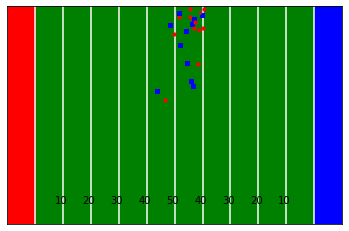

In [119]:
field_height = 53.3

animate_play(2018090600, 366)


In [120]:
def animate_play(game_id, play_id):
    play = tracking.loc[(tracking['gameId'] == game_id) &( tracking['playId'] == play_id)]
    
    play['nflId'] = play['nflId'].fillna('football').astype(str)
    play['marker'] = play['team'].replace({'home': 'o', 'away': 's', 'football': 'd'})
    play['color'] = play['team'].replace({'home': 'r', 'away': 'blue', 'football': 'brown'})

    fig, ax = draw_field()
    markers = {
        f'{x["nflId"]}': ax.scatter(
            x["x"], 
            x["y"],
            s=10,
            marker=x['marker'],
            c=x['color'],
            zorder=3
        ) for x in play.loc[play["frameId"] == 1].to_dict(orient='records')
    }

    def update(i):
        new_values = play.loc[play["frameId"] == i].set_index('nflId')[['x', 'y']].to_dict(orient='index')
        for k, v in markers.items():
            v.set_offsets([new_values[k]['x'], new_values[k]['y']])
        return markers.values()

    ani = FuncAnimation(fig, update, frames=play['frameId'].unique(), blit=True)
    ani.save(f'game-{game_id}_play-{play_id}.gif')

def draw_field():
    fig = plt.figure() 
    ax = plt.axes(xlim=(0, 120), ylim=(0, field_height)) 
    ax.set_facecolor('green')

    # Endzones
    rect = patches.Rectangle((0, 0), 10, field_height, linewidth=1, edgecolor='r', facecolor='red', zorder=1)
    ax.add_patch(rect)
    rect = patches.Rectangle((110, 0), 10, field_height, linewidth=1, edgecolor='blue', facecolor='blue', zorder=1)
    ax.add_patch(rect)

    # Yardlines
    for i in range(12):
        ax.plot((i*10, i*10), (0, field_height), color='w', zorder=1)
        if 1 < i < 11:
            label = (i-1) * 10
            ax.text(i*10 - 3, 5, f'{label}' if i < 6 else f'{100 - label}')

    plt.tick_params(
        axis='both', 
        which='both', 
        bottom=False, 
        top=False,       
        left=False,
        labelbottom=False,
        labelleft=False
    ) 
    return fig, ax
